In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from dataset.sentinel import *
from models.lstm_ae import *
from models.conv_ae import *
import torch
import random
from torchvision.transforms import transforms as T
from config import *
from esa.load_utils import *
from esa.conv_utils import *

import platform

import numpy as np
from omegaconf import OmegaConf
from notebook_utils import launch_train_advice
%matplotlib inline

architecture = 'conv_ae'
os.environ['architecture'] = architecture
config_file = os.path.join(conf_path, architecture+'.yaml')
cfg = OmegaConf.load(config_file)
cfg.dataset.out_window = cfg.dataset.sequence_length

In [2]:
if os.path.exists(model_results+ '{}/'.format(architecture)):
    model_list = os.listdir(model_results+ '{}/'.format(architecture))
    for ix, mn in enumerate(model_list):  
        print('model num {}: {}'.format(ix,model_list[ix]))
else:
    os.makedirs(model_results+ '{}/'.format(architecture))
    model_list = []

model num 0: conv_ae_sl_16_filter_n_64_kernel_size_3_24_03_2023_11:28:54.pth
model num 1: conv_ae_sl_16_filter_n_64_kernel_size_3_03_04_2023_11:50:40.pth


In [3]:
launch_train_advice(cfg, model_list, config_file)

to train a model  switch train_model to True  in the next cell
to train a new model from scratch set train_model to True in the next cell

check the configuration file in /srv/penny/FIORIRE/time_series_anomaly_detection/configuration/conv_ae.yaml to set the hyperparameters of the model

actual dataset configuration is {'name': 'all_2016-2018_clean_std_4s.pkl', 'sequence_length': 16, 'columns': ['RW1_motcurr', 'RW2_motcurr', 'RW3_motcurr', 'RW4_motcurr', 'RW1_cmd_volt', 'RW2_cmd_volt', 'RW3_cmd_volt', 'RW4_cmd_volt', 'RW1_therm', 'RW2_therm', 'RW3_therm', 'RW4_therm', 'RW1_speed', 'RW2_speed', 'RW3_speed', 'RW4_speed'], 'train_val_split': 0.7, 'shuffle': 0, 'columns_subset': 0, 'dataset_subset': 1000000, 'batch_size': 500, 'sampling_rate': '4s', 'scaled': 1, 'target': None, 'forecast': 0, 'forecast_all': 0, 'predict': 0, 'out_window': 16}

actual architecture configuration is {'architecture': 'conv_ae', 'increasing': 0, 'flattened': 1, 'latent_dim': 100, 'stride': 1, 'kernel_size': 3, '

In [4]:
train_model = True

In [5]:
if train_model:
    %run ../main.py --config_name $architecture

now = 2023-04-04 19:21:09.971762


/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU0 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))
/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


{'name': 'all_2016-2018_clean_std_4s.pkl', 'sequence_length': 16, 'columns': ['RW1_motcurr', 'RW2_motcurr', 'RW3_motcurr', 'RW4_motcurr', 'RW1_cmd_volt', 'RW2_cmd_volt', 'RW3_cmd_volt', 'RW4_cmd_volt', 'RW1_therm', 'RW2_therm', 'RW3_therm', 'RW4_therm', 'RW1_speed', 'RW2_speed', 'RW3_speed', 'RW4_speed'], 'train_val_split': 0.7, 'shuffle': 0, 'columns_subset': 0, 'dataset_subset': 1000000, 'batch_size': 500, 'sampling_rate': '4s', 'scaled': 1, 'target': ['RW1_motcurr', 'RW2_motcurr', 'RW3_motcurr', 'RW4_motcurr', 'RW1_cmd_volt', 'RW2_cmd_volt', 'RW3_cmd_volt', 'RW4_cmd_volt', 'RW1_therm', 'RW2_therm', 'RW3_therm', 'RW4_therm', 'RW1_speed', 'RW2_speed', 'RW3_speed', 'RW4_speed'], 'forecast': 0, 'forecast_all': 0, 'predict': 0, 'out_window': 16, 'data_path': '/srv/penny/FIORIRE/time_series_anomaly_detection/data/FIORIRE/dataset_4s', 'n_features': 16, 'epochs': 200, 'lr': 0.001, 'lr_patience': 5, 'es_patience': 10, 'architecture': 'conv_ae', 'increasing': 0, 'flattened': 1, 'latent_dim': 

  0%|▏                                                                                                           | 2/1400 [00:00<06:23,  3.65batch/s]

Loss:
1.3221806287765503



  1%|▉                                                                                                          | 12/1400 [00:02<03:23,  6.82batch/s]

Loss:
0.8079444766044617



  2%|█▋                                                                                                         | 22/1400 [00:03<03:17,  6.97batch/s]

Loss:
0.6808000206947327



  2%|██▍                                                                                                        | 32/1400 [00:05<03:24,  6.68batch/s]

Loss:
0.601331353187561



  3%|███▏                                                                                                       | 42/1400 [00:06<03:19,  6.79batch/s]

Loss:
0.5531555414199829



  4%|███▉                                                                                                       | 52/1400 [00:08<03:24,  6.58batch/s]

Loss:
0.5162699222564697



  4%|████▋                                                                                                      | 62/1400 [00:09<03:41,  6.03batch/s]

Loss:
0.4817246198654175



  5%|█████▌                                                                                                     | 72/1400 [00:11<03:48,  5.80batch/s]

Loss:
0.46399345993995667



  6%|██████▎                                                                                                    | 82/1400 [00:12<03:16,  6.72batch/s]

Loss:
0.4344257116317749



  7%|███████                                                                                                    | 92/1400 [00:14<03:42,  5.89batch/s]

Loss:
0.4363555908203125



  7%|███████▋                                                                                                  | 102/1400 [00:16<03:21,  6.46batch/s]

Loss:
0.39613574743270874



  8%|████████▍                                                                                                 | 112/1400 [00:17<03:09,  6.80batch/s]

Loss:
0.406890869140625



  9%|█████████▏                                                                                                | 122/1400 [00:19<03:13,  6.61batch/s]

Loss:
0.39467960596084595



  9%|█████████▉                                                                                                | 132/1400 [00:20<03:24,  6.19batch/s]

Loss:
0.39054369926452637



 10%|██████████▊                                                                                               | 142/1400 [00:22<03:29,  5.99batch/s]

Loss:
0.3833867609500885



 11%|███████████▌                                                                                              | 152/1400 [00:24<03:32,  5.87batch/s]

Loss:
0.35269322991371155



 12%|████████████▎                                                                                             | 162/1400 [00:26<03:31,  5.86batch/s]

Loss:
0.34174853563308716



 12%|█████████████                                                                                             | 172/1400 [00:27<03:06,  6.59batch/s]

Loss:
0.3398965001106262



 13%|█████████████▊                                                                                            | 182/1400 [00:29<03:07,  6.50batch/s]

Loss:
0.3388540744781494



 14%|██████████████▌                                                                                           | 192/1400 [00:30<02:55,  6.89batch/s]

Loss:
0.3433331847190857



 14%|███████████████▎                                                                                          | 202/1400 [00:32<03:09,  6.32batch/s]

Loss:
0.3302614092826843



 15%|████████████████                                                                                          | 212/1400 [00:34<03:45,  5.28batch/s]

Loss:
0.3310067057609558



 16%|████████████████▊                                                                                         | 222/1400 [00:35<03:15,  6.02batch/s]

Loss:
0.31858980655670166



 17%|█████████████████▌                                                                                        | 232/1400 [00:37<03:06,  6.27batch/s]

Loss:
0.31241607666015625



 17%|██████████████████▎                                                                                       | 242/1400 [00:38<02:52,  6.70batch/s]

Loss:
0.3114085793495178



 18%|███████████████████                                                                                       | 252/1400 [00:40<03:12,  5.98batch/s]

Loss:
0.3100643455982208



 19%|███████████████████▊                                                                                      | 262/1400 [00:42<03:09,  5.99batch/s]

Loss:
0.2994769811630249



 19%|████████████████████▌                                                                                     | 272/1400 [00:43<03:12,  5.87batch/s]

Loss:
0.30691400170326233



 20%|█████████████████████▎                                                                                    | 282/1400 [00:45<03:09,  5.89batch/s]

Loss:
0.29691657423973083



 21%|██████████████████████                                                                                    | 292/1400 [00:47<03:05,  5.98batch/s]

Loss:
0.30286386609077454



 22%|██████████████████████▊                                                                                   | 302/1400 [00:48<03:04,  5.97batch/s]

Loss:
0.30675581097602844



 22%|███████████████████████▌                                                                                  | 312/1400 [00:50<03:00,  6.03batch/s]

Loss:
0.3003891408443451



 23%|████████████████████████▍                                                                                 | 322/1400 [00:52<02:38,  6.82batch/s]

Loss:
0.30019837617874146



 24%|█████████████████████████▏                                                                                | 332/1400 [00:53<02:48,  6.32batch/s]

Loss:
0.2925584018230438



 24%|█████████████████████████▉                                                                                | 342/1400 [00:55<02:56,  6.00batch/s]

Loss:
0.28648462891578674



 25%|██████████████████████████▋                                                                               | 352/1400 [00:57<02:52,  6.06batch/s]

Loss:
0.28901177644729614



 26%|███████████████████████████▍                                                                              | 362/1400 [00:58<02:54,  5.95batch/s]

Loss:
0.2905837893486023



 27%|████████████████████████████▏                                                                             | 372/1400 [01:00<02:51,  6.01batch/s]

Loss:
0.29696571826934814



 27%|████████████████████████████▉                                                                             | 382/1400 [01:02<02:50,  5.96batch/s]

Loss:
0.263855516910553



 28%|█████████████████████████████▋                                                                            | 392/1400 [01:03<02:48,  5.97batch/s]

Loss:
0.26904046535491943



 29%|██████████████████████████████▍                                                                           | 402/1400 [01:05<02:46,  5.99batch/s]

Loss:
0.26585015654563904



 29%|███████████████████████████████▏                                                                          | 412/1400 [01:07<02:41,  6.13batch/s]

Loss:
0.2732175290584564



 30%|███████████████████████████████▉                                                                          | 422/1400 [01:08<02:43,  5.96batch/s]

Loss:
0.27469348907470703



 31%|████████████████████████████████▋                                                                         | 432/1400 [01:10<02:43,  5.91batch/s]

Loss:
0.2779340147972107



 32%|█████████████████████████████████▍                                                                        | 442/1400 [01:12<02:41,  5.92batch/s]

Loss:
0.2717478275299072



 32%|██████████████████████████████████▏                                                                       | 452/1400 [01:13<02:39,  5.93batch/s]

Loss:
0.2655507028102875



 33%|██████████████████████████████████▉                                                                       | 462/1400 [01:15<02:37,  5.96batch/s]

Loss:
0.26072973012924194



 34%|███████████████████████████████████▋                                                                      | 472/1400 [01:17<02:36,  5.94batch/s]

Loss:
0.25506338477134705



 34%|████████████████████████████████████▍                                                                     | 482/1400 [01:18<02:33,  5.98batch/s]

Loss:
0.2347787618637085



 35%|█████████████████████████████████████▎                                                                    | 492/1400 [01:20<02:32,  5.97batch/s]

Loss:
0.2547781467437744



 36%|██████████████████████████████████████                                                                    | 502/1400 [01:22<02:30,  5.97batch/s]

Loss:
0.2451275885105133



 37%|██████████████████████████████████████▊                                                                   | 512/1400 [01:23<02:29,  5.94batch/s]

Loss:
0.2404284030199051



 37%|███████████████████████████████████████▌                                                                  | 522/1400 [01:25<02:25,  6.02batch/s]

Loss:
0.23138481378555298



 38%|████████████████████████████████████████▎                                                                 | 532/1400 [01:27<02:26,  5.94batch/s]

Loss:
0.2343950867652893



 39%|█████████████████████████████████████████                                                                 | 542/1400 [01:28<02:25,  5.89batch/s]

Loss:
0.23974554240703583



 39%|█████████████████████████████████████████▊                                                                | 552/1400 [01:30<02:18,  6.12batch/s]

Loss:
0.24214249849319458



 40%|██████████████████████████████████████████▌                                                               | 562/1400 [01:32<02:01,  6.89batch/s]

Loss:
0.2298261672258377



 41%|███████████████████████████████████████████▏                                                              | 571/1400 [01:33<02:30,  5.50batch/s]


Loss:
0.23780083656311035


 42%|████████████████████████████████████████████                                                              | 582/1400 [01:35<02:08,  6.35batch/s]

Loss:
0.2232959121465683



 42%|████████████████████████████████████████████▊                                                             | 592/1400 [01:37<02:32,  5.29batch/s]

Loss:
0.2100631147623062



 43%|█████████████████████████████████████████████▌                                                            | 602/1400 [01:38<01:56,  6.87batch/s]

Loss:
0.21556371450424194



 44%|██████████████████████████████████████████████▎                                                           | 612/1400 [01:40<02:06,  6.24batch/s]

Loss:
0.21160760521888733



 44%|███████████████████████████████████████████████                                                           | 622/1400 [01:41<01:51,  6.99batch/s]

Loss:
0.21301943063735962



 45%|███████████████████████████████████████████████▊                                                          | 632/1400 [01:43<01:56,  6.59batch/s]

Loss:
0.20640623569488525



 46%|████████████████████████████████████████████████▌                                                         | 642/1400 [01:44<01:51,  6.77batch/s]

Loss:
0.20200274884700775



 47%|█████████████████████████████████████████████████▎                                                        | 652/1400 [01:46<01:59,  6.25batch/s]

Loss:
0.2087671160697937



 47%|██████████████████████████████████████████████████                                                        | 662/1400 [01:47<01:48,  6.81batch/s]

Loss:
0.21805571019649506



 48%|██████████████████████████████████████████████████▉                                                       | 672/1400 [01:49<01:49,  6.66batch/s]

Loss:
0.21355998516082764



 49%|███████████████████████████████████████████████████▋                                                      | 682/1400 [01:51<01:59,  6.03batch/s]

Loss:
0.2152564972639084



 49%|████████████████████████████████████████████████████▍                                                     | 692/1400 [01:52<01:59,  5.95batch/s]

Loss:
0.2164260745048523



 50%|█████████████████████████████████████████████████████▏                                                    | 702/1400 [01:54<01:57,  5.95batch/s]

Loss:
0.20817726850509644



 51%|█████████████████████████████████████████████████████▉                                                    | 712/1400 [01:56<01:53,  6.04batch/s]

Loss:
0.20012353360652924



 52%|██████████████████████████████████████████████████████▋                                                   | 722/1400 [01:57<01:43,  6.56batch/s]

Loss:
0.21007034182548523



 52%|███████████████████████████████████████████████████████▍                                                  | 732/1400 [01:59<01:48,  6.14batch/s]

Loss:
0.19974884390830994



 53%|████████████████████████████████████████████████████████▏                                                 | 742/1400 [02:00<01:36,  6.79batch/s]

Loss:
0.20636004209518433



 54%|████████████████████████████████████████████████████████▉                                                 | 752/1400 [02:02<01:49,  5.91batch/s]

Loss:
0.19057981669902802



 54%|█████████████████████████████████████████████████████████▋                                                | 762/1400 [02:04<01:41,  6.31batch/s]

Loss:
0.22421813011169434



 55%|██████████████████████████████████████████████████████████▍                                               | 772/1400 [02:05<01:58,  5.30batch/s]

Loss:
0.2036435306072235



 56%|███████████████████████████████████████████████████████████▏                                              | 782/1400 [02:07<01:32,  6.70batch/s]

Loss:
0.20391173660755157



 57%|███████████████████████████████████████████████████████████▉                                              | 792/1400 [02:09<01:41,  5.98batch/s]

Loss:
0.1899552196264267



 57%|████████████████████████████████████████████████████████████▋                                             | 802/1400 [02:10<01:40,  5.98batch/s]

Loss:
0.20223242044448853



 58%|█████████████████████████████████████████████████████████████▍                                            | 812/1400 [02:12<01:39,  5.89batch/s]

Loss:
0.19104793667793274



 59%|██████████████████████████████████████████████████████████████▏                                           | 822/1400 [02:14<01:38,  5.89batch/s]

Loss:
0.2009863406419754



 59%|██████████████████████████████████████████████████████████████▉                                           | 832/1400 [02:15<01:35,  5.94batch/s]

Loss:
0.18036819994449615



 60%|███████████████████████████████████████████████████████████████▊                                          | 842/1400 [02:17<01:32,  6.01batch/s]

Loss:
0.1951351910829544



 61%|████████████████████████████████████████████████████████████████▌                                         | 852/1400 [02:19<01:33,  5.87batch/s]

Loss:
0.19691959023475647



 62%|█████████████████████████████████████████████████████████████████▎                                        | 862/1400 [02:20<01:30,  5.94batch/s]

Loss:
0.18739749491214752



 62%|██████████████████████████████████████████████████████████████████                                        | 872/1400 [02:22<01:29,  5.90batch/s]

Loss:
0.18297356367111206



 63%|██████████████████████████████████████████████████████████████████▊                                       | 882/1400 [02:24<01:27,  5.94batch/s]

Loss:
0.18186399340629578



 64%|███████████████████████████████████████████████████████████████████▌                                      | 892/1400 [02:25<01:26,  5.85batch/s]

Loss:
0.1801467090845108



 64%|████████████████████████████████████████████████████████████████████▎                                     | 902/1400 [02:27<01:25,  5.85batch/s]

Loss:
0.18523620069026947



 65%|█████████████████████████████████████████████████████████████████████                                     | 912/1400 [02:29<01:22,  5.95batch/s]

Loss:
0.19182248413562775



 66%|█████████████████████████████████████████████████████████████████████▊                                    | 922/1400 [02:31<01:20,  5.92batch/s]

Loss:
0.19335311651229858



 67%|██████████████████████████████████████████████████████████████████████▌                                   | 932/1400 [02:32<01:19,  5.92batch/s]

Loss:
0.1879698783159256



 67%|███████████████████████████████████████████████████████████████████████▎                                  | 942/1400 [02:34<01:18,  5.85batch/s]

Loss:
0.1868695467710495



 68%|████████████████████████████████████████████████████████████████████████                                  | 952/1400 [02:36<01:16,  5.89batch/s]

Loss:
0.17308150231838226



 69%|████████████████████████████████████████████████████████████████████████▊                                 | 962/1400 [02:37<01:14,  5.91batch/s]

Loss:
0.19498944282531738



 69%|█████████████████████████████████████████████████████████████████████████▌                                | 972/1400 [02:39<01:12,  5.89batch/s]

Loss:
0.1995723843574524



 70%|██████████████████████████████████████████████████████████████████████████▎                               | 982/1400 [02:41<01:10,  5.93batch/s]

Loss:
0.17933352291584015



 71%|███████████████████████████████████████████████████████████████████████████                               | 992/1400 [02:42<01:09,  5.90batch/s]

Loss:
0.19148746132850647



 72%|███████████████████████████████████████████████████████████████████████████▏                             | 1002/1400 [02:44<01:08,  5.83batch/s]

Loss:
0.19514191150665283



 72%|███████████████████████████████████████████████████████████████████████████▉                             | 1012/1400 [02:46<01:06,  5.87batch/s]

Loss:
0.18140916526317596



 73%|████████████████████████████████████████████████████████████████████████████▋                            | 1022/1400 [02:48<01:03,  5.96batch/s]

Loss:
0.18992823362350464



 74%|█████████████████████████████████████████████████████████████████████████████▍                           | 1032/1400 [02:49<01:02,  5.89batch/s]

Loss:
0.18463373184204102



 74%|██████████████████████████████████████████████████████████████████████████████▏                          | 1042/1400 [02:51<00:58,  6.17batch/s]

Loss:
0.18874609470367432



 75%|██████████████████████████████████████████████████████████████████████████████▉                          | 1052/1400 [02:52<00:56,  6.20batch/s]

Loss:
0.1824841946363449



 76%|███████████████████████████████████████████████████████████████████████████████▋                         | 1062/1400 [02:54<00:56,  5.94batch/s]

Loss:
0.1928054541349411



 77%|████████████████████████████████████████████████████████████████████████████████▍                        | 1072/1400 [02:56<00:55,  5.92batch/s]

Loss:
0.16916358470916748



 77%|█████████████████████████████████████████████████████████████████████████████████▏                       | 1082/1400 [02:58<00:53,  5.94batch/s]

Loss:
0.19831056892871857



 78%|█████████████████████████████████████████████████████████████████████████████████▉                       | 1092/1400 [02:59<00:51,  5.94batch/s]

Loss:
0.18774999678134918



 79%|██████████████████████████████████████████████████████████████████████████████████▋                      | 1102/1400 [03:01<00:50,  5.96batch/s]

Loss:
0.17730022966861725



 79%|███████████████████████████████████████████████████████████████████████████████████▍                     | 1112/1400 [03:03<00:48,  5.98batch/s]

Loss:
0.18692636489868164



 80%|████████████████████████████████████████████████████████████████████████████████████▏                    | 1122/1400 [03:04<00:47,  5.89batch/s]

Loss:
0.18719972670078278



 81%|████████████████████████████████████████████████████████████████████████████████████▉                    | 1132/1400 [03:06<00:44,  6.00batch/s]

Loss:
0.1873164027929306



 82%|█████████████████████████████████████████████████████████████████████████████████████▋                   | 1142/1400 [03:08<00:42,  6.02batch/s]

Loss:
0.19196319580078125



 82%|██████████████████████████████████████████████████████████████████████████████████████▍                  | 1152/1400 [03:09<00:41,  5.94batch/s]

Loss:
0.1826474964618683



 83%|███████████████████████████████████████████████████████████████████████████████████████▏                 | 1162/1400 [03:11<00:39,  5.96batch/s]

Loss:
0.18088024854660034



 84%|███████████████████████████████████████████████████████████████████████████████████████▉                 | 1172/1400 [03:13<00:38,  5.93batch/s]

Loss:
0.1800171434879303



 84%|████████████████████████████████████████████████████████████████████████████████████████▋                | 1182/1400 [03:14<00:37,  5.82batch/s]

Loss:
0.19356942176818848



 85%|█████████████████████████████████████████████████████████████████████████████████████████▍               | 1192/1400 [03:16<00:35,  5.93batch/s]

Loss:
0.1747625172138214



 86%|██████████████████████████████████████████████████████████████████████████████████████████▏              | 1202/1400 [03:18<00:33,  5.95batch/s]

Loss:
0.1825610101222992



 87%|██████████████████████████████████████████████████████████████████████████████████████████▉              | 1212/1400 [03:19<00:31,  5.90batch/s]

Loss:
0.1760290265083313



 87%|███████████████████████████████████████████████████████████████████████████████████████████▋             | 1222/1400 [03:21<00:29,  5.96batch/s]

Loss:
0.18571190536022186



 88%|████████████████████████████████████████████████████████████████████████████████████████████▍            | 1232/1400 [03:23<00:28,  5.93batch/s]

Loss:
0.18444788455963135



 89%|█████████████████████████████████████████████████████████████████████████████████████████████▏           | 1242/1400 [03:25<00:26,  5.93batch/s]

Loss:
0.17554230988025665



 89%|█████████████████████████████████████████████████████████████████████████████████████████████▉           | 1252/1400 [03:26<00:25,  5.91batch/s]

Loss:
0.17884065210819244



 90%|██████████████████████████████████████████████████████████████████████████████████████████████▋          | 1262/1400 [03:28<00:23,  5.91batch/s]

Loss:
0.1895538717508316



 91%|███████████████████████████████████████████████████████████████████████████████████████████████▍         | 1272/1400 [03:30<00:21,  5.92batch/s]

Loss:
0.18124301731586456



 92%|████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1282/1400 [03:31<00:19,  5.94batch/s]

Loss:
0.17792236804962158



 92%|████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1292/1400 [03:33<00:18,  5.92batch/s]

Loss:
0.17728911340236664



 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1302/1400 [03:35<00:16,  6.05batch/s]

Loss:
0.1718062311410904



 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1312/1400 [03:36<00:14,  5.99batch/s]

Loss:
0.17171664535999298



 94%|███████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1322/1400 [03:38<00:13,  5.95batch/s]

Loss:
0.17234274744987488



 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1332/1400 [03:40<00:11,  5.96batch/s]

Loss:
0.1797894537448883



 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1342/1400 [03:41<00:09,  5.87batch/s]

Loss:
0.18108905851840973



 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1352/1400 [03:43<00:08,  5.92batch/s]

Loss:
0.17732034623622894



 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1362/1400 [03:45<00:06,  5.93batch/s]

Loss:
0.1761048585176468



 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1372/1400 [03:46<00:04,  6.00batch/s]

Loss:
0.16517193615436554



 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1382/1400 [03:48<00:02,  6.41batch/s]

Loss:
0.17335039377212524



 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1392/1400 [03:50<00:01,  6.16batch/s]

Loss:
0.17857564985752106



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1400/1400 [03:51<00:00,  6.05batch/s]

train loss at the end of epoch is  0.2526778618672064




  0%|                                                                                                                     | 0/200 [06:10<?, ?epoch/s]


KeyboardInterrupt: 

In [6]:
model_list = os.listdir(model_results+ '{}/'.format(architecture))
if len(model_list) > 0:
    model_list = os.listdir(model_results+ '{}/'.format(architecture))
    for ix, mn in enumerate(model_list):  
        print('model num {}: {}'.format(ix,model_list[ix]))
    model_available = True
else:
    print('no model available')

model num 0: conv_ae_sl_16_filter_n_64_kernel_size_3_24_03_2023_11:28:54.pth
model num 1: conv_ae_sl_16_filter_n_64_kernel_size_3_03_04_2023_11:50:40.pth


In [11]:
selected_model = 0
if model_available:
    print(model_list[selected_model])
    model_name = model_list[selected_model].split('.')[0]
else:
    print('no model available')

conv_ae_sl_16_filter_n_64_kernel_size_3_24_03_2023_11:28:54.pth


In [9]:
try:
    sm = str(torch.cuda.get_device_capability())
    sm = ''.join((sm.strip('()').split(',')[0], sm.strip('()').split(',')[1])).replace(' ', '')
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda and sm in torch.cuda.get_arch_list() else "cpu")
except:
    device='cpu'

/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU0 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))
/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


In [10]:
checkpoint  = torch.load(model_results+ '{}/'.format(architecture) + '/' + model_list[selected_model]
                         , map_location=device)
params_conf = checkpoint['param_conf']

In [11]:
cols = params_conf['columns']
sequence_length = params_conf['sequence_length']
batch_size = params_conf['batch_size']
predict = params_conf['predict']

out_window = params_conf['out_window']

n_features = params_conf['n_features']
scaled = params_conf['scaled']
sampling_rate = params_conf['sampling_rate']

columns_subset = params_conf['columns_subset']
dataset_subset = params_conf['dataset_subset']

dataset = params_conf['name']
train_val_split = params_conf['train_val_split']

target = params_conf['target']
batch_size = params_conf['batch_size']
sequence_length = params_conf['sequence_length']
out_window = params_conf['out_window']
predict = params_conf['predict']
activation = params_conf['activation']
kernel_size = params_conf['kernel_size']
filter_num = params_conf['filter_num']
latent_dim = params_conf['latent_dim']
n_layers = params_conf['n_layers']

data_path = params_conf['data_path']

In [13]:
model = CONV_AE(in_channel=1,heigth=sequence_length, width=len(columns),
                        kernel_size=kernel_size, filter_num=filter_num,
                 latent_dim=latent_dim, \
        n_layers=n_layers, activation = activation).to(device)

model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
par_nums = count_parameters(model)
print('number of params', par_nums)

Initializing conv2d weights with Kaiming He normal
Initializing conv2d weights with Kaiming He normal
number of params 47705


In [14]:
transform = T.Compose([T.ToTensor()])
dataset_name = os.path.join(data_path.strip('..'), "all_2016-2018_clean_std_4s.pkl")

#test=False

df_train, df_test, train_iter, test_iter = \
read_dataset_conv(dataset_name, params_conf['scaled'],params_conf['columns_subset']
                  , params_conf['dataset_subset'], params_conf['columns'], 
                 params_conf['train_val_split'], params_conf['sequence_length']
                  ,params_conf['sequence_length'],  predict=False,
                 batch_size=4, transform=transform)

In [15]:
compute_mse_val_loss = True

In [16]:
mse_val_loss_list = []
criterion = nn.MSELoss()
if compute_mse_val_loss:
    for i, (x,y) in enumerate(test_iter):
        yo = model(x)
        mse_val_loss_list.append(criterion(yo, x).item())
        print(i, np.mean(mse_val_loss_list))
    mse_val_loss = np.mean(mse_val_loss_list)
    print(mse_val_loss)

In [17]:
num_batch = 10
x, shift = unrolling_batches_conv(num_batch=num_batch, test_iter=test_iter, 
                         sequence_length=sequence_length, cols=cols, shift = None)
    
print('time horizon', num_batch*params_conf['sequence_length'])

time horizon 160


In [18]:
yo = model(x.to(device)).squeeze()
if inject_anomalies:
    ya = model(xa.to(device)).squeeze()
save = False

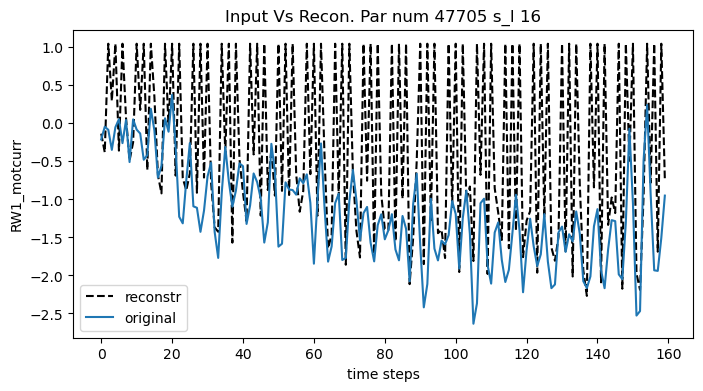

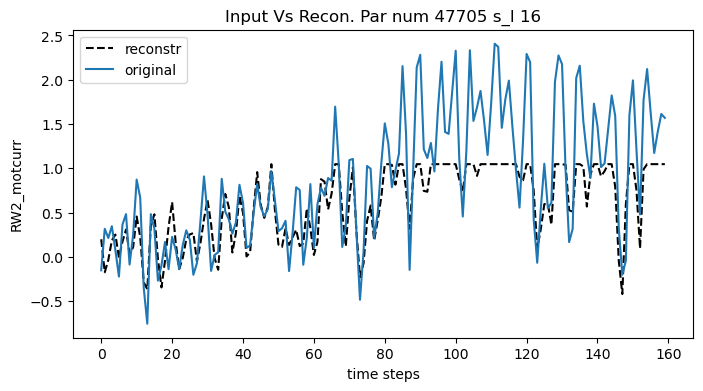

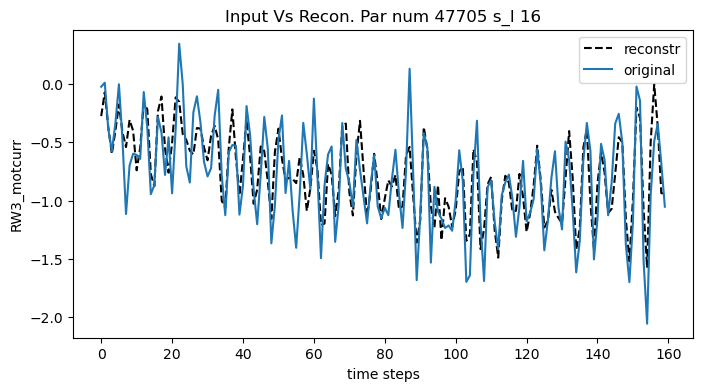

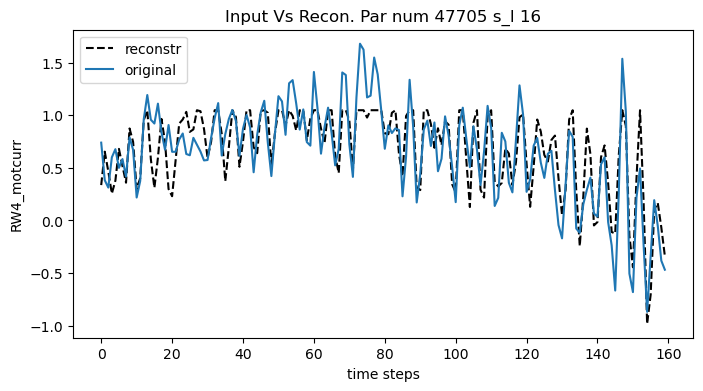

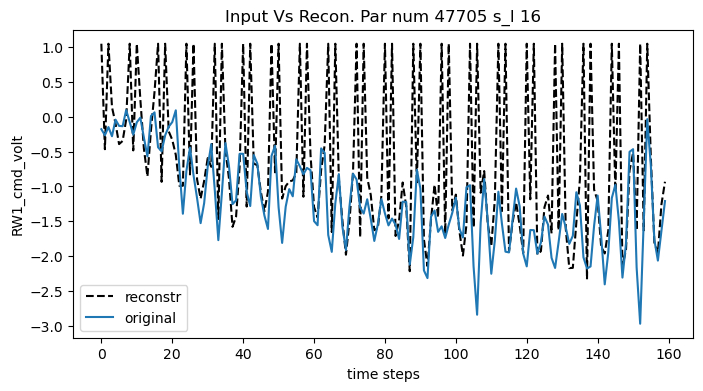

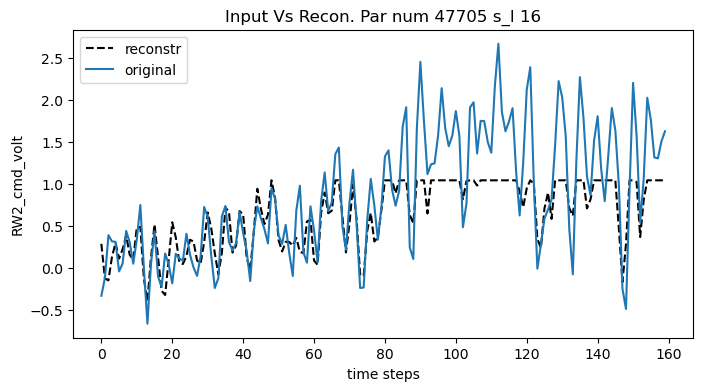

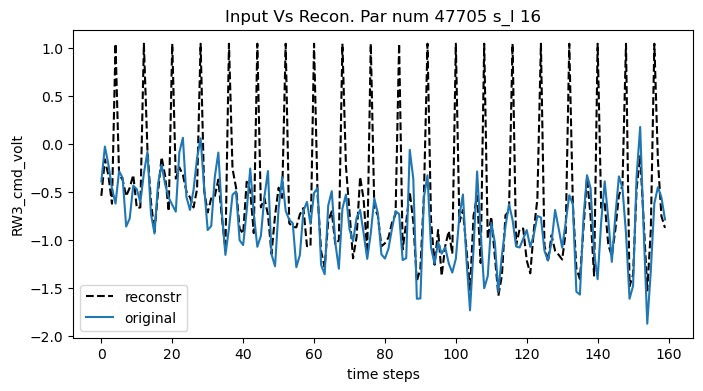

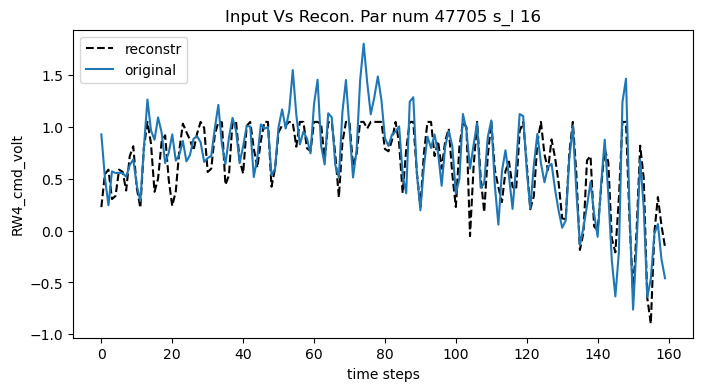

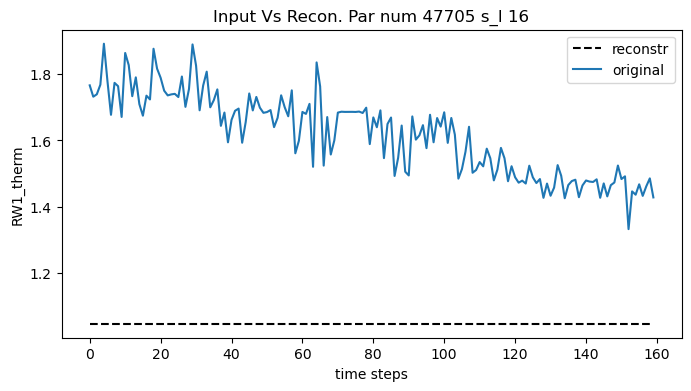

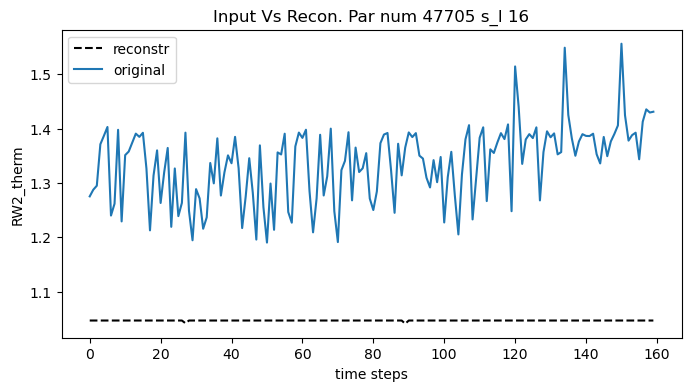

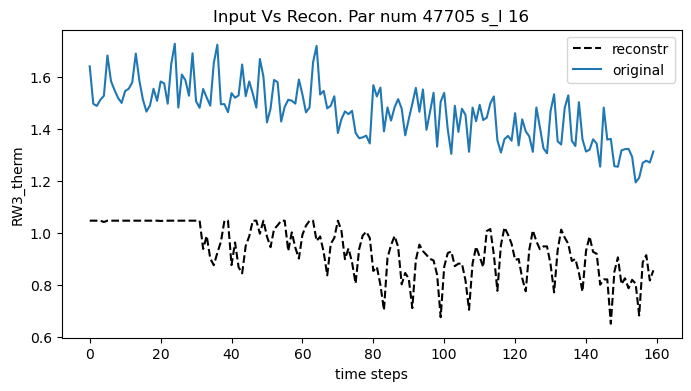

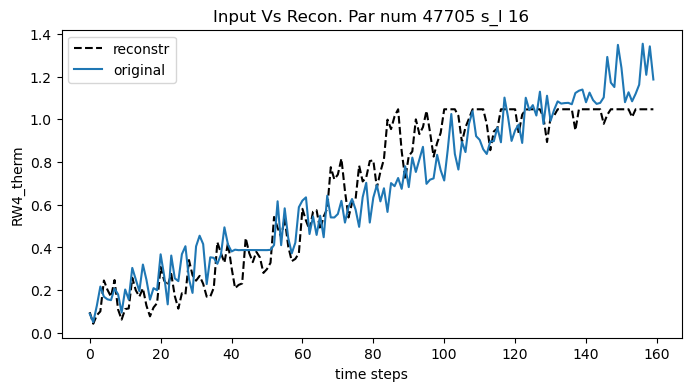

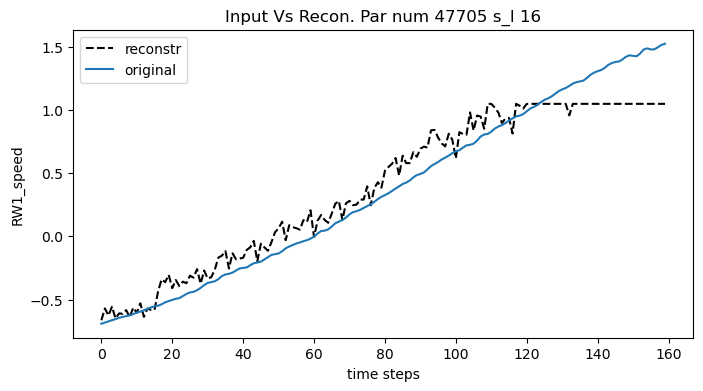

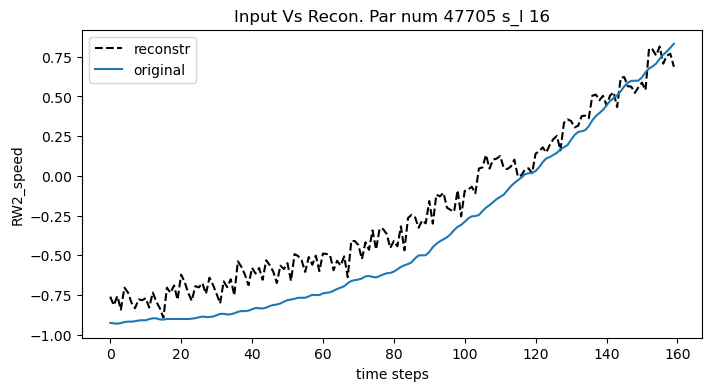

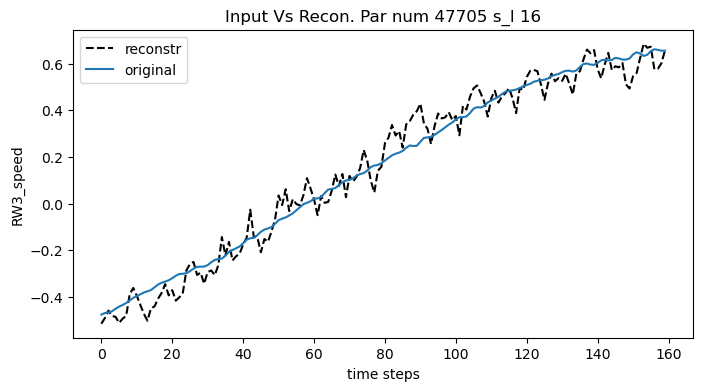

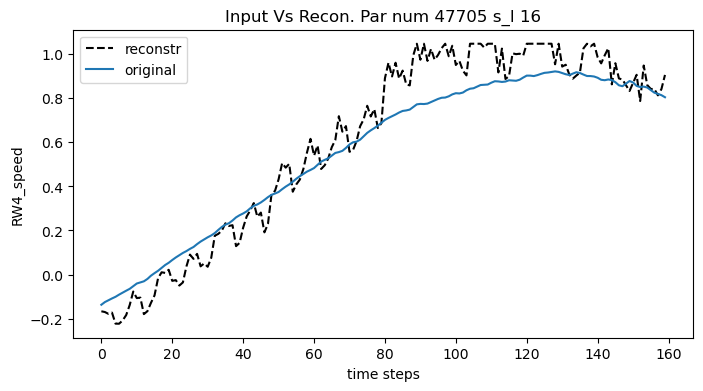

In [19]:
x_plot = x.squeeze().to(device)

show_results(x_plot , yo, cols, model_name, params_conf
     , par_nums, shift, num_batch,arch=architecture,save=False)